# 1. Setup

## 1.1 Install Dependencies

In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


## 1.2 Import Dependencies

In [1]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# Import tensorflow dependencies - Functional API
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

## 1.3 Set GPU Growth

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

TensorFlow version: 2.14.0


## 1.4 Create Folder Structures

In [17]:
# Setup paths
POS_PATH = os.path.join(os.getcwd(),'data', 'positive')
NEG_PATH = os.path.join(os.getcwd(),'data', 'negative')
ANC_PATH = os.path.join(os.getcwd(),'data', 'anchor')
print(ANC_PATH)

C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor


In [4]:
# Make the directories
os.makedirs(POS_PATH,exist_ok=True)
os.makedirs(NEG_PATH,exist_ok=True)
os.makedirs(ANC_PATH,exist_ok=True)

# 2. Collect Positives and Anchors

## 2.1 Untar Labelled Faces in the Wild Dataset

In [ ]:
# http://vis-www.cs.umass.edu/lfw/

In [ ]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
import tarfile
import os

# Specify the path to your tar archive
tar_file_path = './lfw.gz'

# Specify the directory where you want to extract the contents
extracted_dir = 'lfw'

# Create the target directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Open the tar archive
with tarfile.open(tar_file_path, 'r:gz') as tar:
    # Extract all contents to the target directory
    tar.extractall(path=extracted_dir)

In [11]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

## 2.2 Collect Positive and Anchor Classes

In [5]:
# Import uuid library to generate unique image names
#%pip install uuid
import uuid


In [8]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\28a0647e-837d-11ee-9702-44032cde706b.jpg'

In [6]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path \
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

        success = cv2.imwrite(imgname, frame)
        if success:
            print("Image saved successfully.")
            print(imgname)
        else:
            print("Error saving image.")
            print(cv2.error)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        success = cv2.imwrite(imgname, frame)
        if success:
            print("Image saved successfully.")
            print(imgname)
        else:
            print("Error saving image.")
            print(cv2.error)
    
    # Show image back to screenq
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a3375e87-83a7-11ee-b7d2-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a38b6aef-83a7-11ee-8ce8-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a4033696-83a7-11ee-aa64-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a4210911-83a7-11ee-8ef9-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a65911c4-83a7-11ee-a77e-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a6b1da25-83a7-11ee-bddb-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ad4456d5-83a7-11ee-8deb-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ad49570e-83a7-11ee-a64f-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ad4df57f-83a7-11ee-a643-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ad52df17-83a7-11ee-99cf-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ae2a876e-83a7-11ee-9858-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ae533c34-83a7-11ee-9e45-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d38a6ce8-83a7-11ee-8c32-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d3a6533c-83a7-11ee-bc98-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d47225db-83a7-11ee-b58c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d4ac8c28-83a7-11ee-88b8-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d4ce08db-83a7-11ee-b692-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d50ad3f0-83a7-11ee-a327-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d77fe681-83a7-11ee-8d72-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d78d1d0e-83a7-11ee-83c3-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d791e4d7-83a7-11ee-8e47-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d796a5c9-83a7-11ee-a5b9-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d7a4120b-83a7-11ee-9959-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\d7b0f2d5-83a7-11ee-9839-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\da8ce59b-83a7-11ee-928c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\da99d596-83a7-11ee-9fe5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\da9eb6b0-83a7-11ee-a0f3-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\daa2bcf2-83a7-11ee-b0c0-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\daa852fd-83a7-11ee-9aad-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\daac8bb5-83a7-11ee-9318-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ddf2a77c-83a7-11ee-97b0-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ddf76560-83a7-11ee-8a13-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ddfc2e86-83a7-11ee-a74e-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\de08e146-83a7-11ee-a61a-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\de0db38d-83a7-11ee-a841-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\de12970a-83a7-11ee-8380-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e330c25a-83a7-11ee-9f79-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e335a3cf-83a7-11ee-a3f7-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e342cc25-83a7-11ee-802d-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e3478eb7-83a7-11ee-85de-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e34c4a02-83a7-11ee-b521-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e35989a8-83a7-11ee-b1a1-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e9bcdb71-83a7-11ee-b2ea-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e9c19d16-83a7-11ee-b9b9-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e9c65ec0-83a7-11ee-aaf0-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e9cb594f-83a7-11ee-86bd-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e9d8bc44-83a7-11ee-be5b-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\e9e6451b-83a7-11ee-a5cf-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ec3b05f9-83a7-11ee-ab3d-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ec484a4e-83a7-11ee-8196-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ec4d1831-83a7-11ee-815f-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ec5e8185-83a7-11ee-a81e-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ec63d429-83a7-11ee-baae-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\ec711670-83a7-11ee-b990-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f1619cdc-83a7-11ee-9993-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f16f2be5-83a7-11ee-9243-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f17c9fe6-83a7-11ee-b2c8-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f1811952-83a7-11ee-9491-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f23c6566-83a7-11ee-bcfb-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f2868949-83a7-11ee-9fc5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f56d3b47-83a7-11ee-be40-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f57ac455-83a7-11ee-b14b-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f5883317-83a7-11ee-8679-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f58c8f90-83a7-11ee-aaf6-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f5915346-83a7-11ee-8650-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f59e8c05-83a7-11ee-9550-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f7532fe3-83a7-11ee-9ac2-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f758bb2a-83a7-11ee-b60e-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f7666ff8-83a7-11ee-b92f-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f7739433-83a7-11ee-8ab2-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f7787307-83a7-11ee-8b1f-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\f77d2a49-83a7-11ee-9046-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\fd90084d-83a7-11ee-a352-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\fdb840cb-83a7-11ee-8c65-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\fdc5ae8a-83a7-11ee-9570-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\fdd41c43-83a7-11ee-a32c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\fde29592-83a7-11ee-a465-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\fdf55aee-83a7-11ee-9512-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\026249fc-83a8-11ee-a498-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0270f08e-83a8-11ee-9ce8-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\027d198a-83a8-11ee-8c31-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\028be875-83a8-11ee-99a2-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\02a5ce03-83a8-11ee-a6cd-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\02b3ae4d-83a8-11ee-b37f-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\065921f2-83a8-11ee-bdc3-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0667cd30-83a8-11ee-9003-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0678d624-83a8-11ee-a5ea-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\06876cf3-83a8-11ee-84ad-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\069dbc9b-83a8-11ee-ab76-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\073a7522-83a8-11ee-91e2-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0b43132b-83a8-11ee-bec0-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0b59023c-83a8-11ee-8150-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0b67241f-83a8-11ee-959d-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0bddde85-83a8-11ee-a36a-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0bec3e49-83a8-11ee-bda5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\0bfe83e8-83a8-11ee-9446-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\155a14c1-83a8-11ee-a1aa-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1579583d-83a8-11ee-8dc3-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\15875231-83a8-11ee-9ccd-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\159d6b20-83a8-11ee-bbba-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\15abe043-83a8-11ee-bfa5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\15c37378-83a8-11ee-9547-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\19ab03be-83a8-11ee-a9d6-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\19c19afb-83a8-11ee-b02c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\19cf970b-83a8-11ee-a5e1-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\19e7a001-83a8-11ee-9a9d-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1a01692a-83a8-11ee-b47e-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1a1053b8-83a8-11ee-9dde-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1dcc9086-83a8-11ee-96c7-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1de754dd-83a8-11ee-9e11-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1df614fd-83a8-11ee-b4bf-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1e0266bd-83a8-11ee-9196-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1e06c0be-83a8-11ee-b8e3-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\1e13f2dd-83a8-11ee-a8ff-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\64f772c8-83a8-11ee-b52f-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\650cf098-83a8-11ee-9bbe-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\651c00a9-83a8-11ee-8546-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6528c428-83a8-11ee-b90b-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\65370a7c-83a8-11ee-98f2-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6544dbef-83a8-11ee-a868-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6e4b9481-83a8-11ee-ad90-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6e7dcc92-83a8-11ee-8dba-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6e84fe22-83a8-11ee-928b-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6e9382d5-83a8-11ee-9854-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6ea95502-83a8-11ee-a50b-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\6eb77985-83a8-11ee-ae17-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\725e4723-83a8-11ee-98ca-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\72749284-83a8-11ee-ae4a-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\72837a8b-83a8-11ee-9316-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\72f9a333-83a8-11ee-9228-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\73108d55-83a8-11ee-9804-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\731e6b33-83a8-11ee-81a8-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\77678812-83a8-11ee-89d8-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7775b810-83a8-11ee-9082-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7783c341-83a8-11ee-9353-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\77a7812e-83a8-11ee-b928-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\77b5a458-83a8-11ee-8629-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\77c41bac-83a8-11ee-89d6-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7b8f540b-83a8-11ee-8cd5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7ba8c5e4-83a8-11ee-ae97-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7baf8444-83a8-11ee-be52-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7bc58b26-83a8-11ee-bdd5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7bdb5940-83a8-11ee-b326-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\7c05938f-83a8-11ee-bf86-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\953a6198-83a8-11ee-81fa-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9548f295-83a8-11ee-a0a2-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9563223c-83a8-11ee-8c3c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\95718c50-83a8-11ee-8eb9-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9594f1d9-83a8-11ee-bed4-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\95a3a9c0-83a8-11ee-89c5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9b3eb7b8-83a8-11ee-9b8b-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9b4bf794-83a8-11ee-87cb-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9b5a60d3-83a8-11ee-b07e-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9b7da251-83a8-11ee-b309-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9b8bdd83-83a8-11ee-a9f3-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\positive\9b99f4c1-83a8-11ee-ac5c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\9f434a30-83a8-11ee-8c5c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\9f50b345-83a8-11ee-b2dd-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\9f5dec4f-83a8-11ee-aea0-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\9f6bccd9-83a8-11ee-aee3-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\9f78f687-83a8-11ee-b7cb-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\9f7db7af-83a8-11ee-86e6-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a18dc5b3-83a8-11ee-a0f5-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a1929e34-83a8-11ee-9d9a-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a197aa33-83a8-11ee-a5dd-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a19c8b68-83a8-11ee-a4d8-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a1a92ca0-83a8-11ee-ab8f-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a1b7583b-83a8-11ee-99ac-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a38b7897-83a8-11ee-95ad-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a398a24e-83a8-11ee-bf1c-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a39d922f-83a8-11ee-882a-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a3a254e2-83a8-11ee-87de-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a3a7059f-83a8-11ee-8122-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a3ae617c-83a8-11ee-b38a-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a7469335-83a8-11ee-ab78-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a7540773-83a8-11ee-9765-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a7598869-83a8-11ee-a697-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a7664168-83a8-11ee-b46a-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a76b1fa8-83a8-11ee-abbb-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectManagement\FaceRecognition\data\anchor\a76f2735-83a8-11ee-aafe-8cec4b08e8e0.jpg
Image saved successfully.
C:\Users\goldo\OneDrive\Documents\AiLabs\ProjectMa

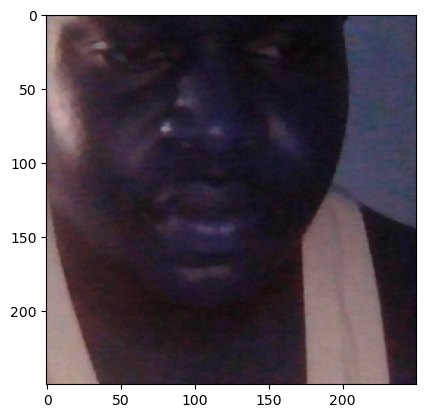

In [11]:
plt.imshow(frame,)

# 2.x NEW - Data Augmentation

In [21]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))
            
        data.append(img)
    
    return data

In [23]:
import os
import uuid


In [26]:
img_path = os.path.join(ANC_PATH, 'd6f7d6dc-83a7-11ee-b2fc-8cec4b08e8e0.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [27]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img) 
    
    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

# 3. Load and Preprocess Images

## 3.1 Get Image Directories

In [29]:

anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(3000)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(3000)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*/*.jpg').take(3000)

In [30]:
dir_test = anchor.as_numpy_iterator()

In [31]:
print(dir_test.next())

b'C:\\Users\\goldo\\OneDrive\\Documents\\AiLabs\\ProjectManagement\\FaceRecognition\\data\\anchor\\dadeaa32-83a7-11ee-ae37-8cec4b08e8e0.jpg'


## 3.2 Preprocessing - Scale and Resize

In [32]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

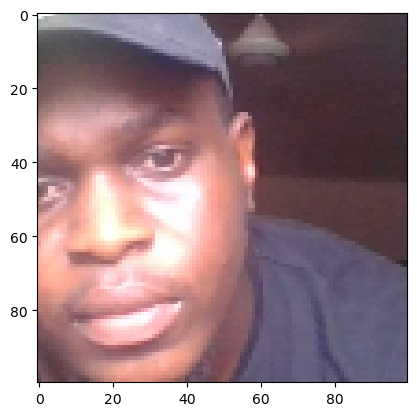

In [41]:
img = preprocess('data\\anchor\\d6f7d6dc-83a7-11ee-b2fc-8cec4b08e8e0.jpg')
plt.imshow(img)

In [34]:
img.numpy().max() 

1.0

In [35]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

## 3.3 Create Labelled Dataset

In [45]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0
tf.zeros(len(anchor))

<tf.Tensor: shape=(890,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [36]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [37]:
samples = data.as_numpy_iterator()

In [38]:
exampple = samples.next()

In [44]:
exampple
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

## 3.4 Build Train and Test Partition

In [46]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [47]:
res = preprocess_twin(*exampple)

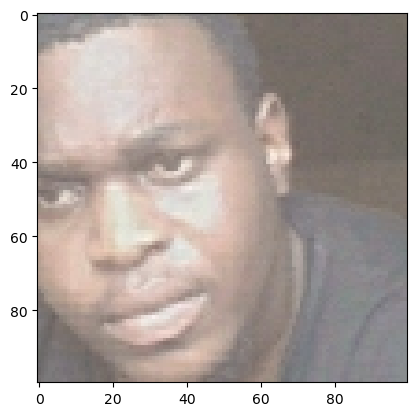

In [48]:
plt.imshow(res[1])

In [49]:
res[2]

1.0

In [50]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [51]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [52]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# 4. Model Engineering

## 4.1 Build Embedding Layer

In [53]:
inp = Input(shape=(100,100,3), name='input_image')

In [54]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [55]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [56]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [57]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [58]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [59]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [60]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [61]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [62]:
embedding = make_embedding()

In [63]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

## 4.2 Build Distance Layer

In [64]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [65]:
l1 = L1Dist()

In [67]:
l1(embedding, validation_embedding)

NameError: name 'validation_embedding' is not defined

## 4.3 Make Siamese Model

In [68]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [69]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [70]:
siamese_layer = L1Dist()

In [71]:
distances = siamese_layer(inp_embedding, val_embedding)

In [72]:
classifier = Dense(1, activation='sigmoid')(distances)

In [73]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [74]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [75]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [76]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [77]:
siamese_model = make_siamese_model()

In [78]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

# 5. Training

## 5.1 Setup Loss and Optimizer

In [79]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [80]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

## 5.2 Establish Checkpoints

In [81]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

## 5.3 Build Train Step Function

In [82]:
test_batch = train_data.as_numpy_iterator()

In [83]:
batch_1 = test_batch.next()

In [85]:
X = batch_1[:2]

In [86]:
y = batch_1[2]

In [87]:
y

array([0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [88]:
tf.losses.BinaryCrossentropy??

In [84]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

## 5.4 Build Training Loop

In [89]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [90]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## 5.5 Train the model

In [91]:
EPOCHS = 50

In [92]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
78/78 [==============================] - 1697s 22s/step
0.33553967 0.83624804 0.9943289

 Epoch 2/50
1/1 [==============================] - 2s 2s/step


78/78 [==============================] - 1688s 22s/step
0.0058913627 0.9754501 0.99499166

 Epoch 3/50
25/78 [========>.....................] - ETA: 19:29

KeyboardInterrupt: 

# 6. Evaluate Model

## 6.1 Import Metrics

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

## 6.2 Make Predictions

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
y_hat = siamese_model.predict([test_input, test_val])

In [ ]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]

In [ ]:
y_true

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 6.3 Calculate Metrics

In [ ]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1.0 0.99889135


## 6.4 Viz Results

In [ ]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

# 7. Save Model

In [ ]:
# Save weights
siamese_model.save('shepherdfacialrecognition.h5')

In [ ]:
L1Dist

In [ ]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

array([[2.7295970e-05],
       [8.7373185e-01],
       [1.1476276e-06],
       [9.9997568e-01],
       [9.9490523e-01],
       [2.8164588e-06],
       [2.9260066e-06],
       [1.0000000e+00]], dtype=float32)

In [ ]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38960448    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_6 (L1Dist)              (None, 4096)         0           embedding[0][0]     

# 8. Real Time Test

## 8.1 Verification Function

In [ ]:
application_data\verification_images

In [ ]:
os.listdir(os.path.join('application_data', 'verification_images'))

In [ ]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

In [ ]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

In [ ]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

## 8.2 OpenCV Real Time Verification

In [ ]:
cap = cv2.VideoCapture(4)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

True


In [ ]:
np.sum(np.squeeze(results) > 0.9)

36

In [ ]:
results

[array([[0.9944859]], dtype=float32),
 array([[0.9999912]], dtype=float32),
 array([[0.9999943]], dtype=float32),
 array([[0.9999951]], dtype=float32),
 array([[0.99993753]], dtype=float32),
 array([[0.9082498]], dtype=float32),
 array([[0.9999846]], dtype=float32),
 array([[0.9834683]], dtype=float32),
 array([[0.87159216]], dtype=float32),
 array([[0.7328309]], dtype=float32),
 array([[0.74533516]], dtype=float32),
 array([[0.949607]], dtype=float32),
 array([[0.7501703]], dtype=float32),
 array([[0.60669833]], dtype=float32),
 array([[0.93921214]], dtype=float32),
 array([[0.9813106]], dtype=float32),
 array([[0.9848625]], dtype=float32),
 array([[0.89696234]], dtype=float32),
 array([[0.98896575]], dtype=float32),
 array([[0.99082947]], dtype=float32),
 array([[0.7747197]], dtype=float32),
 array([[0.99999297]], dtype=float32),
 array([[0.99986887]], dtype=float32),
 array([[0.9999764]], dtype=float32),
 array([[0.90808266]], dtype=float32),
 array([[0.8795649]], dtype=float32),
 a